# Rossmann Store Sales

- Bases de dados: https://www.kaggle.com/c/rossmann-store-sales/data


O uso de Machine Learning é importante para aumentar a competitividade das empresas ao prever vendas futuras. Essas bases de dados contém históricos de vendas de 1.115 lojas Rossmann.

**O objetivo deste projeto é prever vendas diárias futuras.**

Modelos de previsão de vendas baseados em dados passados devem considerar o que chamamos de efeitos sazonais, que são efeitos como demanda, feriados, concorrência e promoções.

As base de dados contém histórico de transações e dados das lojas:

- **id**- identificador da transação (loja+data)
- **Store** - identificador único para cada loja
- **Sales** - o volume de negócios/vendas para um determinado dia (objetivo)
- **Customers** - o número de clientes em um determinado dia
- **Open** - um indicador para saber se a loja estava aberta: 0 = fechado, 1 = aberto
- **StateHoliday** - indica um feriado estadual. Normalmente todas as lojas, com poucas exceções, fecham nos feriados estaduais. Observe que todas as escolas fecham nos feriados e fins de semana. 
 - a = feriado, b = feriado da Páscoa, c = Natal, 0 = nenhum

- **SchoolHoliday** - feriado escolar
- **StoreType** - diferencia entre 4 modelos de loja diferentes: a, b, c, d
- **Assortment** - descreve um nível de sortimento: 
  - a = básico, b = extra, c = estendido
- **CompetitionDistance** - distância em metros até a loja concorrente mais próxima
- **CompetitionOpenSince[Month/Year]** - fornece o ano e o mês aproximados da hora em que o concorrente mais próximo foi aberto
- **Promo** - indica se uma loja está realizando uma promoção naquele dia
- **Promo2** - Promo2 é uma promoção contínua e consecutiva para algumas lojas: 
  - 0 = loja não está participando, 1 = loja está participando
- **Promo2Since[Year/Week]** - descreve o ano e a semana em que a loja começou a participar do Promo2
- **PromoInterval** - descreve os intervalos consecutivos em que o Promo2 é iniciado, nomeando os meses em que a promoção é reiniciada. Por exemplo. "Fevereiro, maio, agosto, novembro" significa que cada rodada começa em fevereiro, maio, agosto, novembro de qualquer ano para essa loja



## Importação das bibliotecas e base de dados

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Observando dados das vendas

In [3]:
df_stores = pd.read_csv('final_data.csv')

In [4]:
df_stores.head()

,Store,DayOfWeek,Date,Sales,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,...,IsPromo,Year,Month,Day,WeekOfYear,YearWeek,CompetitionSince,CompetitionTimeMonth,PromoSince,PromoTimeWeek
0,1,5,2015-07-31,5263,1,RegularDay,1,c,basic,1270.0,...,0,2015,7,31,31,2015-30,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,1,RegularDay,1,a,basic,570.0,...,1,2015,7,31,31,2015-30,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,1,RegularDay,1,a,basic,14130.0,...,1,2015,7,31,31,2015-30,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1,RegularDay,1,c,extended,620.0,...,0,2015,7,31,31,2015-30,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,1,RegularDay,1,a,basic,29910.0,...,0,2015,7,31,31,2015-30,2015-04-01,4,2015-07-27,0


### Descrições gerais

In [5]:
num_var = df_stores.select_dtypes(include=['int64','float64'])
cat_var = df_stores.select_dtypes(exclude=['int64','float64','datetime64[ns]'])

In [6]:
# mean, median
ct1 = pd.DataFrame(num_var.apply(np.mean)).T
ct2 = pd.DataFrame(num_var.apply(np.median)).T
# std, min, max, range, skew, kurtosis
df1 = pd.DataFrame(num_var.apply(np.std)).T
df2 = pd.DataFrame(num_var.apply(min)).T
df3 = pd.DataFrame(num_var.apply(max)).T
df4 = pd.DataFrame(num_var.apply(lambda x: x.max()-x.min())).T
df5 = pd.DataFrame(num_var.apply(lambda x: x.skew())).T
df6 = pd.DataFrame(num_var.apply(lambda x: x.kurtosis())).T

m = pd.concat([df2,df3,df4,ct1,ct2,df1,df5,df6]).T.reset_index()
m.columns = ['Attr', 'Min','Max','Range','Mean','Median','Std','Skew','Kurtosis']

In [7]:
m.round(2)

,Attr,Min,Max,Range,Mean,Median,Std,Skew,Kurtosis
0,Store,1.0,1115.0,1114.0,558.42,558.0,321.73,0.00,-1.20
1,DayOfWeek,1.0,7.0,6.0,3.52,3.0,1.72,0.02,-1.26
2,Sales,46.0,41551.0,41505.0,6955.96,6369.0,3103.81,1.59,4.85
3,Promo,0.0,1.0,1.0,0.45,0.0,0.50,0.22,-1.95
4,SchoolHoliday,0.0,1.0,1.0,0.19,0.0,0.40,1.55,0.41
5,CompetitionDistance,20.0,200000.0,199980.0,5961.83,2330.0,12592.17,10.13,145.29
6,CompetitionOpenSinceMonth,1.0,12.0,11.0,6.79,7.0,3.31,-0.05,-1.23
7,CompetitionOpenSinceYear,1900.0,2015.0,115.0,2010.33,2012.0,5.50,-7.22,123.90
8,Promo2,0.0,1.0,1.0,0.50,0.0,0.50,0.01,-2.00
9,Promo2SinceWeek,1.0,52.0,51.0,23.63,22.0,14.29,0.17,-1.19


Sales
- a média de vendas é de 5773
- a venda máxima foi de 41551
- a venda mínima foi de 0
- a média e mediana são bem próximas, o que indica uma normalidade na distribuição das vendas

In [12]:
sns.set()

In [10]:
aux = df_stores[ df_stores['Sales'] < df_stores['Sales'].quantile(0.95)]

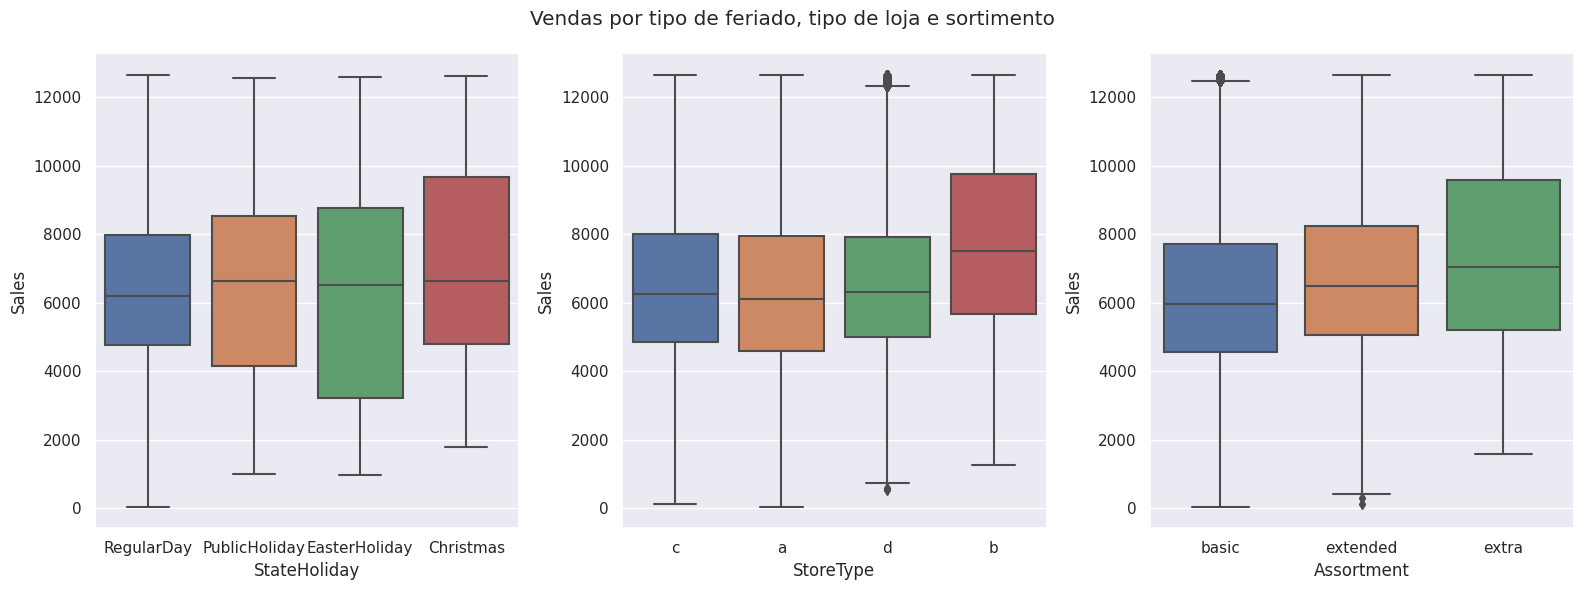

In [16]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,6))
sns.set_theme()
sns.boxplot(aux,x='StateHoliday',y='Sales', ax=ax1)
sns.boxplot(aux,x='StoreType',y='Sales', ax=ax2)
sns.boxplot(aux,x='Assortment',y='Sales', ax=ax3)
plt.suptitle('Vendas por tipo de feriado, tipo de loja e sortimento')
fig.tight_layout()

## MindMap de hipóteses

#### Hipoteses Loja

1. Lojas com número maior de funcionários deveriam vender mais.
2. Lojas com maior capacidade de estoque deveriam vender mais.
3. Lojas com maior porte deveriam vender mais.
4. Lojas com maior sortimentos deveriam vender mais.
5. Lojas com competidores mais próximos deveriam vender menos.
6. Lojas com competidores à mais tempo deveriam vender mais.

#### Hipoteses Produto
1. Lojas que investem mais em Marketing deveriam vender mais.
2. Lojas com maior exposição de produto deveriam vender mais.
3. Lojas com produtos com preço menor deveriam vender mais.
5. Lojas com promoções mais agressivas ( descontos maiores ), deveriam vender mais.
6. Lojas com promoções ativas por mais tempo deveriam vender mais.
7. Lojas com mais dias de promoção deveriam vender mais.
8. Lojas com mais promoções consecutivas deveriam vender mais.

#### Hipoteses Tempo
1. Lojas abertas durante o feriado de Natal deveriam vender mais.
2. Lojas deveriam vender mais ao longo dos anos.
3. Lojas deveriam vender mais no segundo semestre do ano.
4. Lojas deveriam vender mais depois do dia 10 de cada mês.
5. Lojas deveriam vender menos aos finais de semana.
6. Lojas deveriam vender menos durante os feriados escolares.

### Lista Final de Hipóteses
1. Lojas com maior sortimentos deveriam vender mais.
2. Lojas com competidores mais próximos deveriam vender menos.
3. Lojas com competidores à mais tempo deveriam vendem mais.
4. Lojas com promoções ativas por mais tempo deveriam vender mais.
5. Lojas com mais dias de promoção deveriam vender mais.
7. Lojas com mais promoções consecutivas deveriam vender mais.
8. Lojas abertas durante o feriado de Natal deveriam vender mais.
9. Lojas deveriam vender mais ao longo dos anos.
10. Lojas deveriam vender mais no segundo semestre do ano.
11. Lojas deveriam vender mais depois do dia 10 de cada mês.
12. Lojas deveriam vender menos aos finais de semana.
13. Lojas deveriam vender menos durante os feriados escolares.

In [19]:
import datetime

In [20]:
df_stores['Date'] = pd.to_datetime(df_stores['Date'])

## **Análise exploratória dos dados**

#### Análise univariada

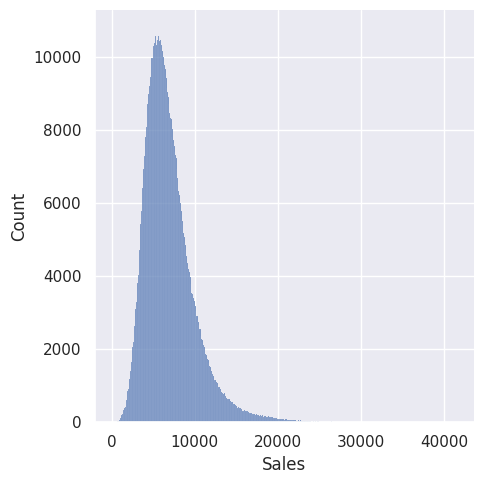

In [22]:
sns.displot(df_stores['Sales'])

A maioria das vendas parecem estar aproximadamente entre 5 e 8000

In [23]:
num_var = df_stores.select_dtypes(include=['int64','float64'])

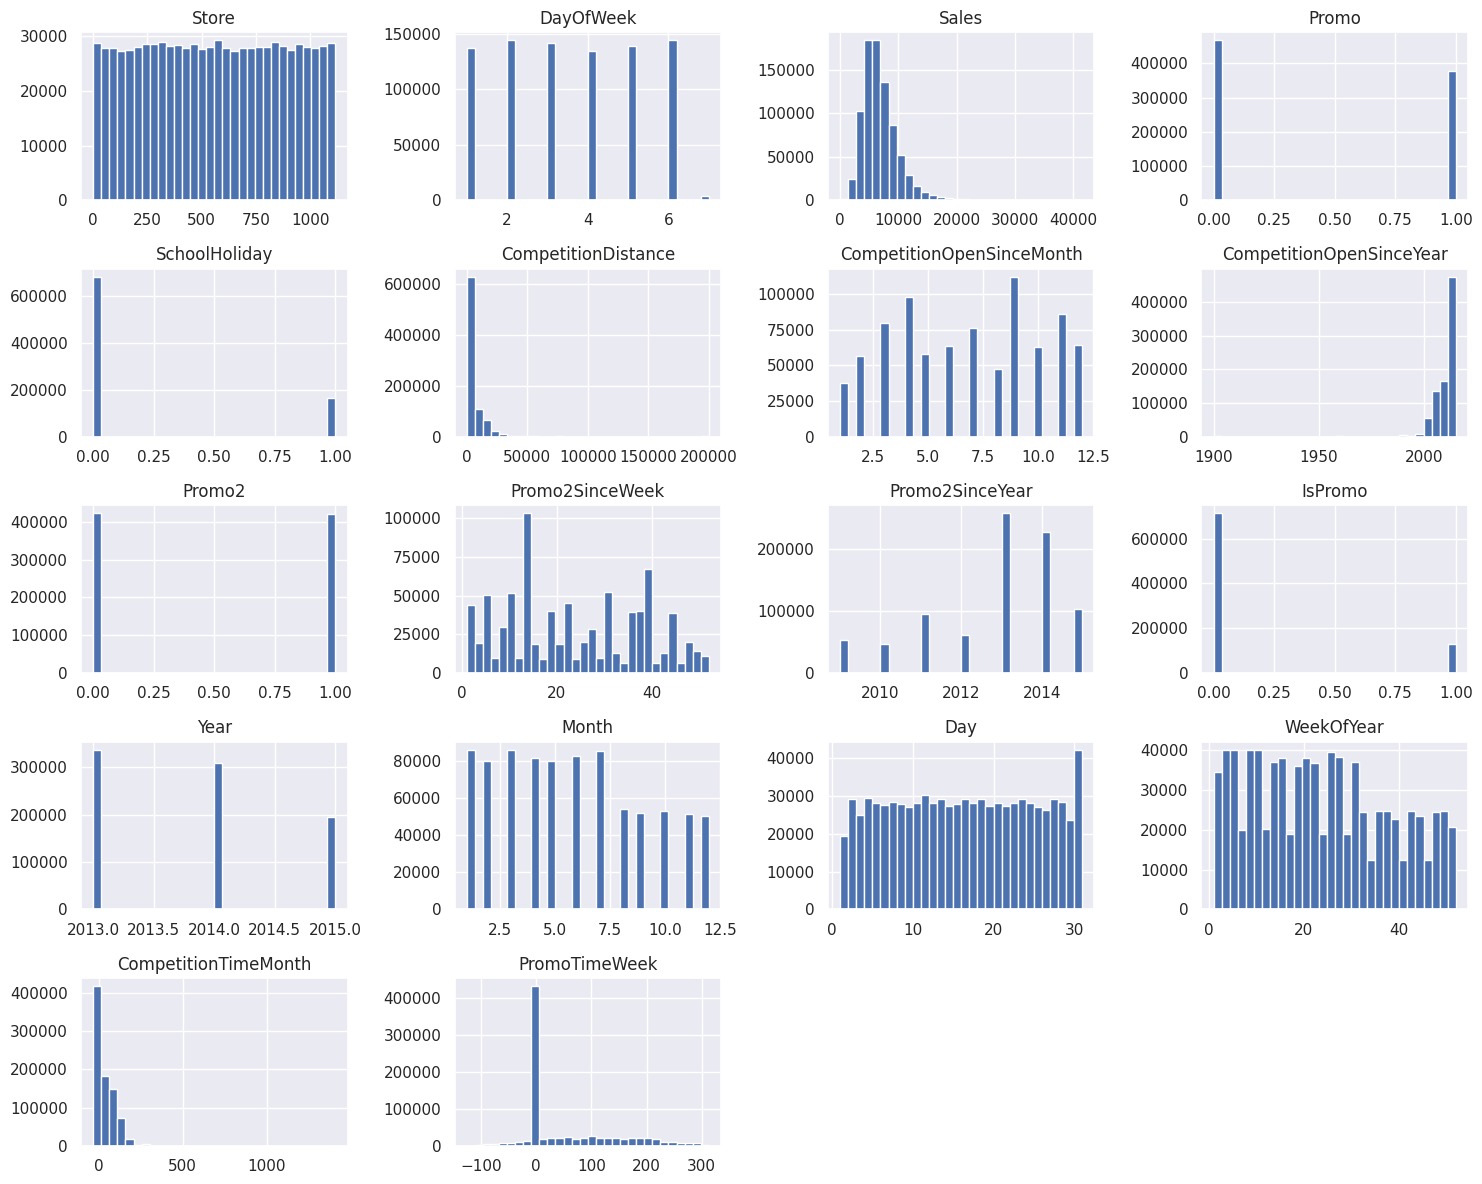

In [24]:
num_var.hist(bins=30, figsize=(15,12))
plt.tight_layout()

In [145]:
df_stores['StateHoliday'].value_counts()

RegularDay       843428
PublicHoliday       694
EasterHoliday       145
Christmas            71
Name: StateHoliday, dtype: int64

In [144]:
a = df_stores[df_stores['StateHoliday']!='RegularDay']

<Axes: xlabel='Sales', ylabel='Density'>

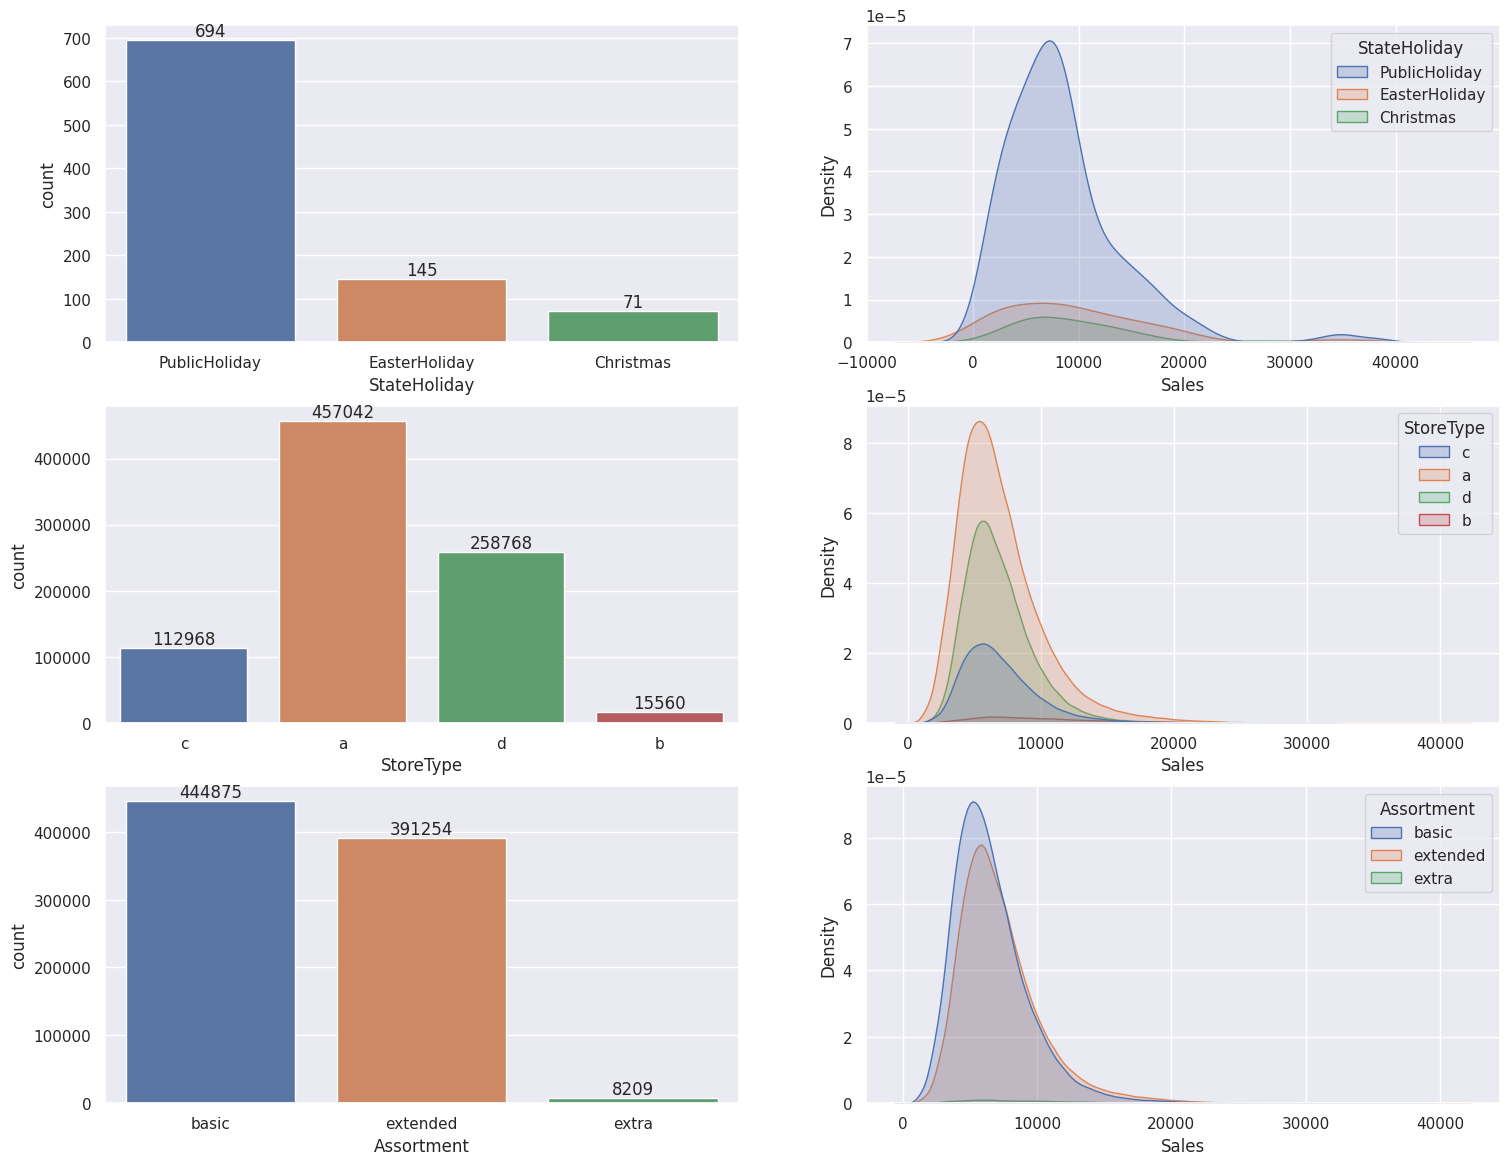

In [141]:
fig, axes = plt.subplots(3, 2, figsize=(18, 14))

sns.countplot(x=a['StateHoliday'],ax=axes[0,0])
axes[0,0].bar_label(axes[0,0].containers[0])
sns.kdeplot(data=a, x='Sales',hue='StateHoliday',fill=True, ax=axes[0,1])

sns.countplot(x=df_stores['StoreType'],ax=axes[1,0])
axes[1,0].bar_label(axes[1,0].containers[0])
sns.kdeplot(data=df_stores, x='Sales',hue='StoreType',fill=True, ax=axes[1,1])

sns.countplot(x=df_stores['Assortment'],ax=axes[2,0])
axes[2,0].bar_label(axes[2,0].containers[0])
sns.kdeplot(data=df_stores, x='Sales',hue='Assortment',fill=True, ax=axes[2,1])


#### Análise bivariada

H1. Lojas com maior sortimentos deveriam vender mais

In [150]:
aux1 = df_stores[['Assortment','Sales']].groupby('Assortment')['Sales'].sum().reset_index()
aux1

,Assortment,Sales
0,basic,2945750070
1,extended,2856484241
2,extra,70946312


[Text(0, 0, '2945750070.00'),
 Text(0, 0, '2856484241.00'),
 Text(0, 0, '70946312.00')]

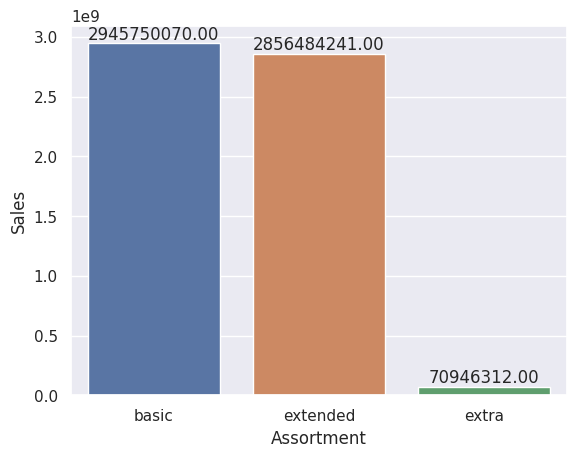

In [155]:
ax = sns.barplot(aux1, x='Assortment', y='Sales')
ax.bar_label(ax.containers[0],fmt='%.2f')

Considerando que o sortimento trata as diversas opções de categorias vendidas por uma loja, então a categoria extra significa uma loja com maior sortimento. Então a H1 é falsa, pois as lojas com maiores sortimentos tem o menor valor de soma de vendas.

Mas vamos analisar o comportamento das vendas ao longo do tempo para verificar se o extra teve uma queda de vendas durante o tempo ou se sempre foi constantemente mais baixo que os outros.

<Axes: xlabel='YearWeek'>

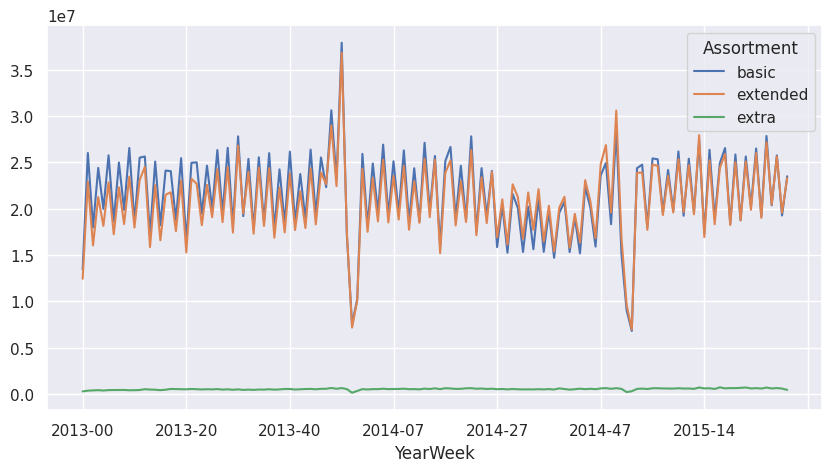

In [161]:
aux2 = df_stores[['YearWeek','Assortment','Sales']].groupby(['YearWeek','Assortment']).sum().reset_index()
aux2 = aux2.pivot_table(index='YearWeek',columns='Assortment',values='Sales')
aux2.plot(figsize=(10,5))

Vemos que o comportamento das vendas do basic e extended ao longo do tempo são bem parecidos, enquanto há uma notória diferença para o extra.

Então vamos analisar o que aconteceu apenas com o extra nesse período de tempo.

<Axes: xlabel='YearWeek'>

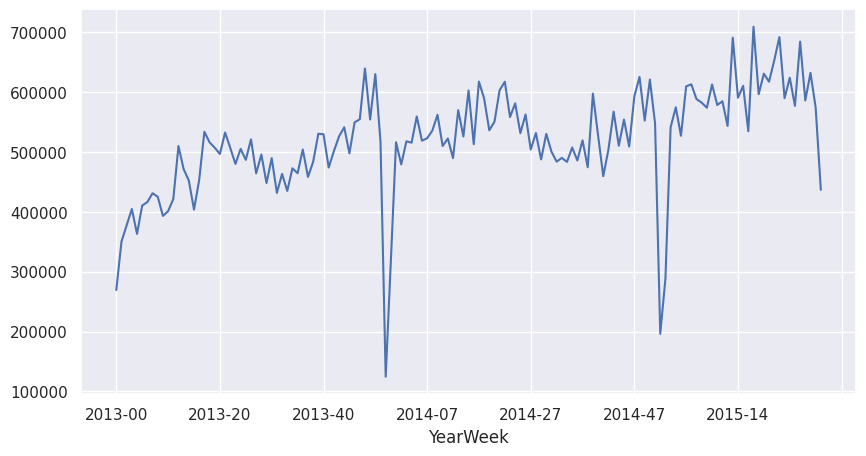

In [166]:
aux2['extra'].plot(figsize=(10,5))

Vemos que o comportamento das vendas do Assortment extra não é algo contínuo como visto antes. Mas de qualquer forma, a H1 continuará sendo falsa, devido a grande diferença do extra para os demais.

H2. Lojas com competidores mais próximos deveriam vender menos

In [261]:
aux3 = df_stores[['CompetitionDistance','Sales']].groupby('CompetitionDistance')['Sales'].sum().reset_index()

In [262]:
aux3

,CompetitionDistance,Sales
0,20.0,4579807
1,30.0,17552666
2,40.0,29261626
3,50.0,60835848
4,60.0,22088359
...,...,...
650,46590.0,3554993
651,48330.0,3798660
652,58260.0,5718883
653,75860.0,6896821


In [263]:
bins = list (np.arange(0,200000+1,1000))
aux3['CompetitionDistanceBinned'] = pd.cut(aux3['CompetitionDistance'], bins=bins)
aux4 = aux3[['CompetitionDistanceBinned','Sales']].groupby('CompetitionDistanceBinned')['Sales'].sum().reset_index()

In [280]:
aux4['CompetitionDistanceBinned'] = aux4['CompetitionDistanceBinned'].astype('object')

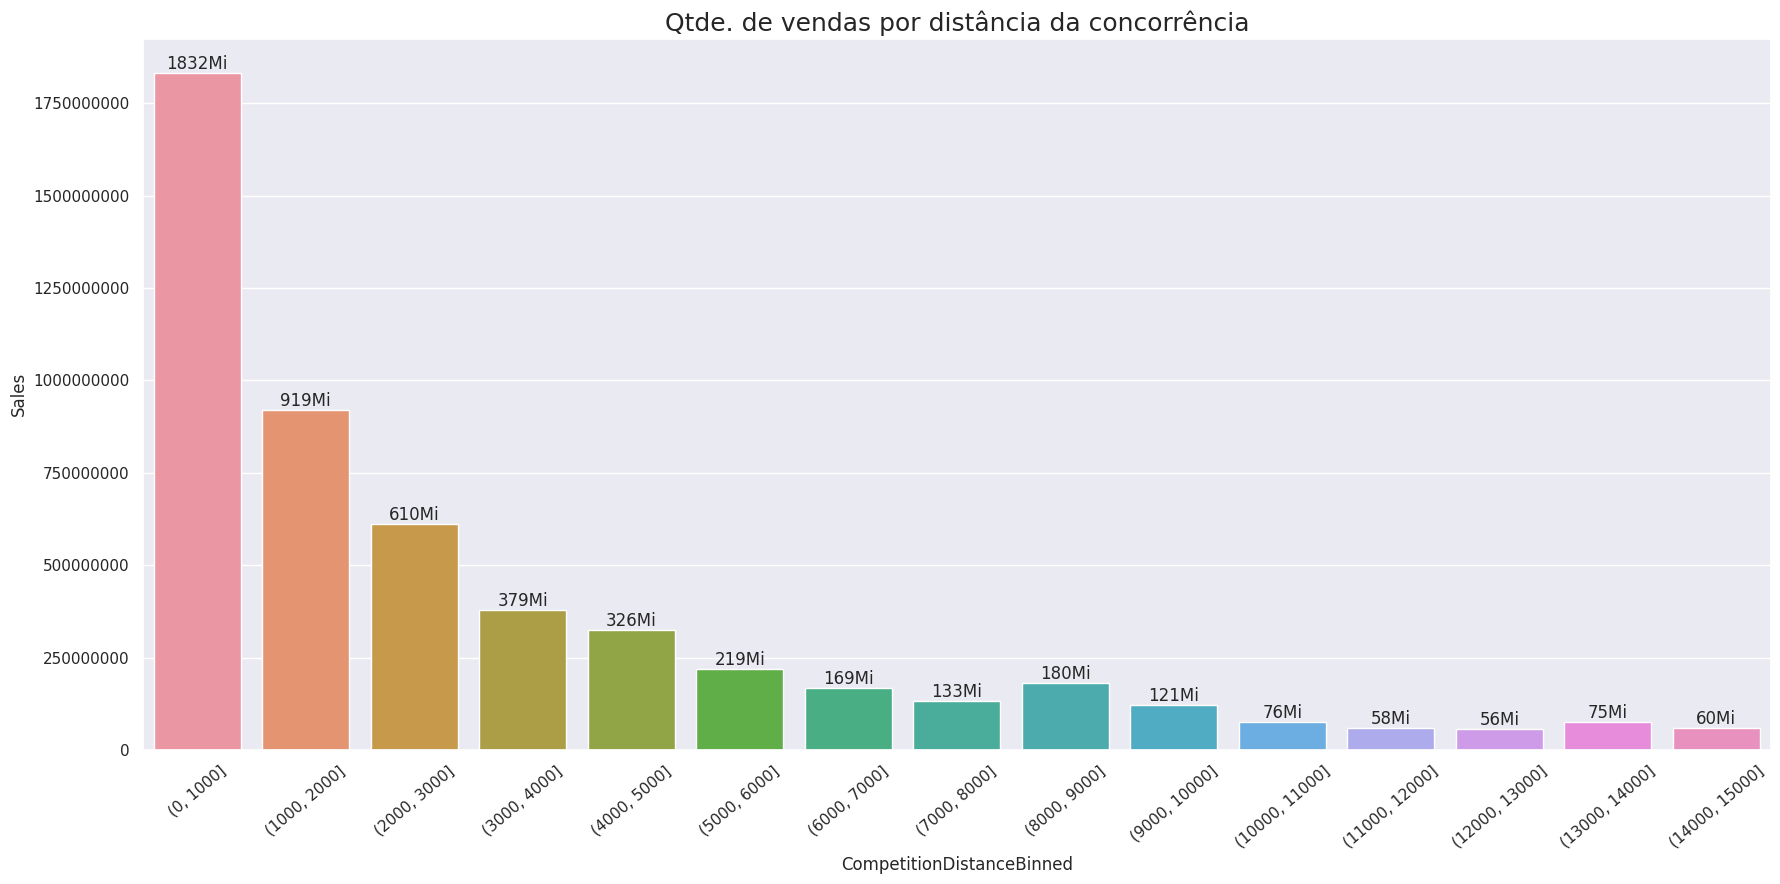

In [299]:
plt.figure(figsize=(18,9))
ax = sns.barplot(data=aux4.head(15),x='CompetitionDistanceBinned', y='Sales')
for tick in ax.get_xticklabels():
    tick.set_rotation(40)
ax.bar_label(ax.containers[0],fmt= lambda x: str(round(x/1000000)) + 'Mi')
plt.ticklabel_format(style='plain', axis='y')

ax.set_title('Qtde. de vendas por distância da concorrência', size=18)
plt.tight_layout()

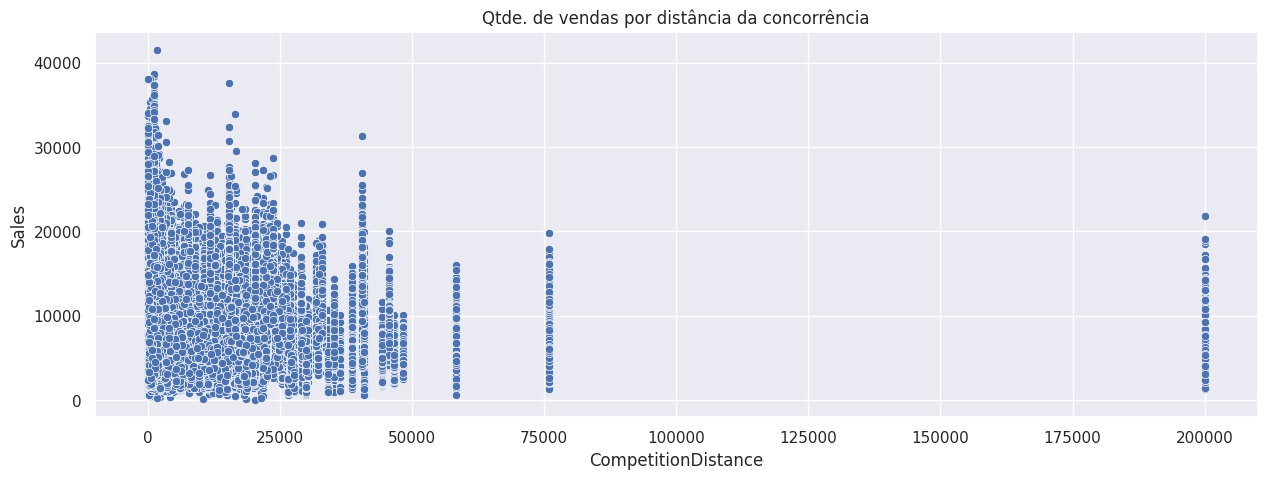

In [304]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=df_stores, x='CompetitionDistance', y='Sales')
plt.title('Qtde. de vendas por distância da concorrência', size=12)
plt.show()

Os maiores volumes de vendas encontram-se para os competidores mais próximos. Então a nossa H2 é falsa, pois vemos que as vendas são maiores quando há competidores mais próximos.

H3. Lojas com competidores a mais tempo deveriam vender mais

In [311]:
aux5 = df_stores[['CompetitionTimeMonth','Sales']].groupby('CompetitionTimeMonth')['Sales'].sum().reset_index()

In [326]:
aux5 = aux5[(aux5['CompetitionTimeMonth']<20) & (aux5['CompetitionTimeMonth']!=0)]

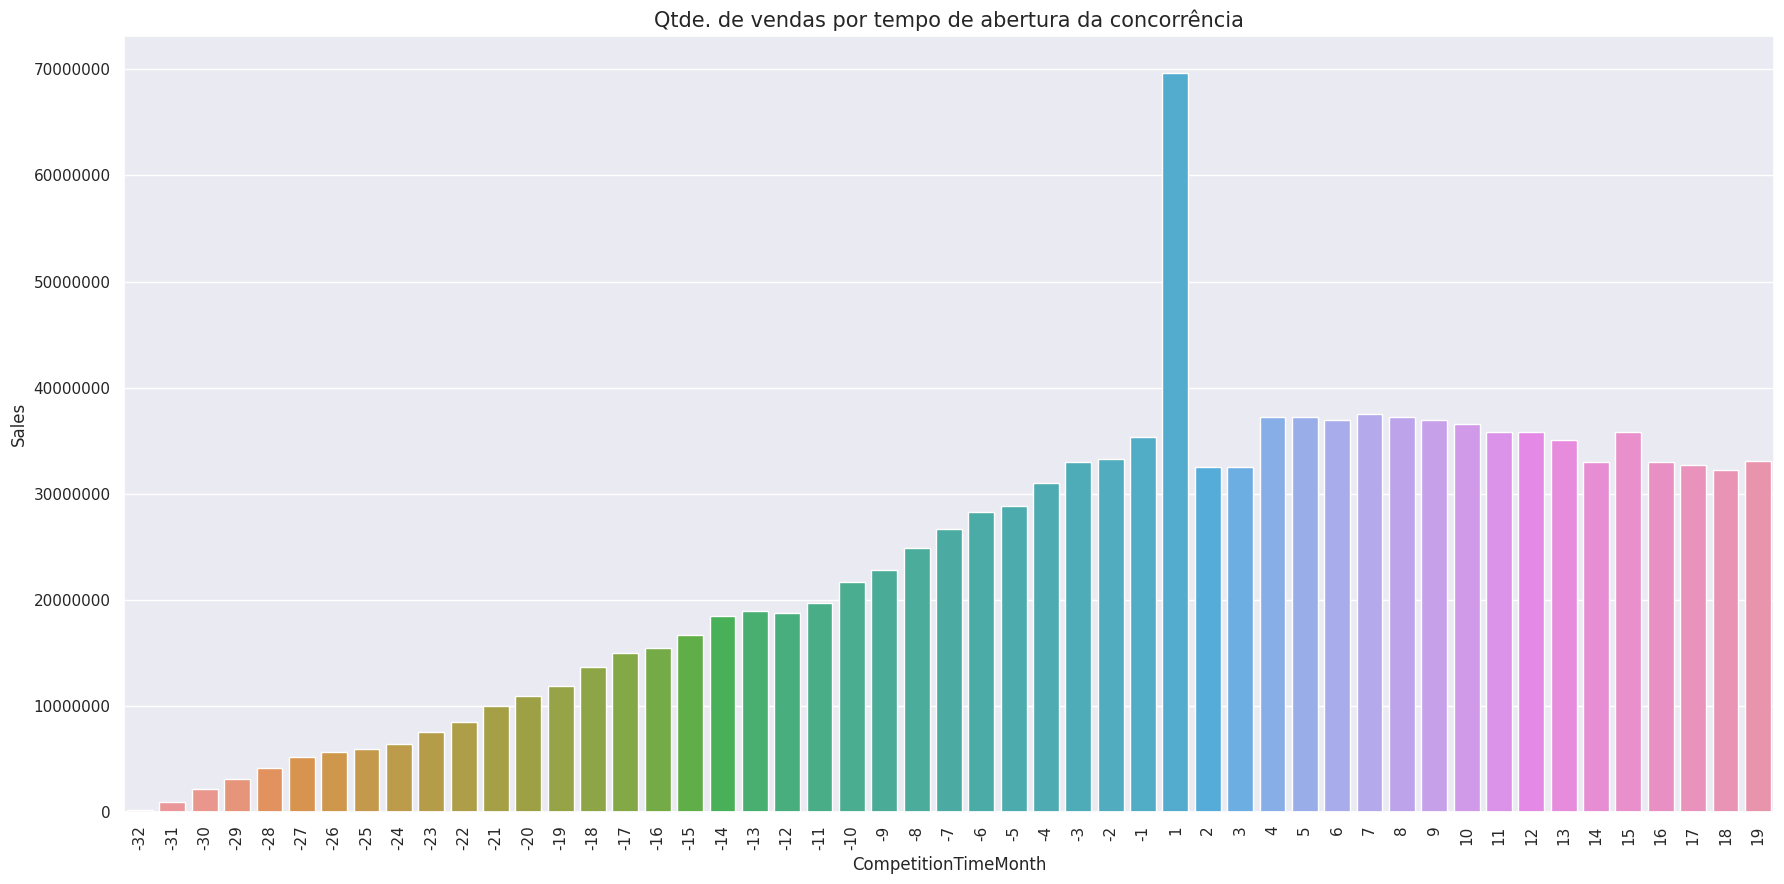

In [328]:
plt.figure(figsize=(18,9))
ax = sns.barplot(x='CompetitionTimeMonth', y='Sales', data=aux5)
#ax.bar_label(ax.containers[0],fmt= lambda x: str(round(x/1000000)) + 'Mi')
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Qtde. de vendas por tempo de abertura da concorrência', size=15)
plt.tight_layout()

Vemos que quanto mais nos aproximamos de 0, mais as vendas continuam a crescer, e isso significa que quanto mais recente for o competidor aberto, maiores são as vendas. Então nossa H3 também é falsa, pois as lojas com competidores a mais tempo (representada pelos valores negativos no gráfico) venderam menos.

H4. Lojas com promoções ativas por mais tempo deveriam vender mais

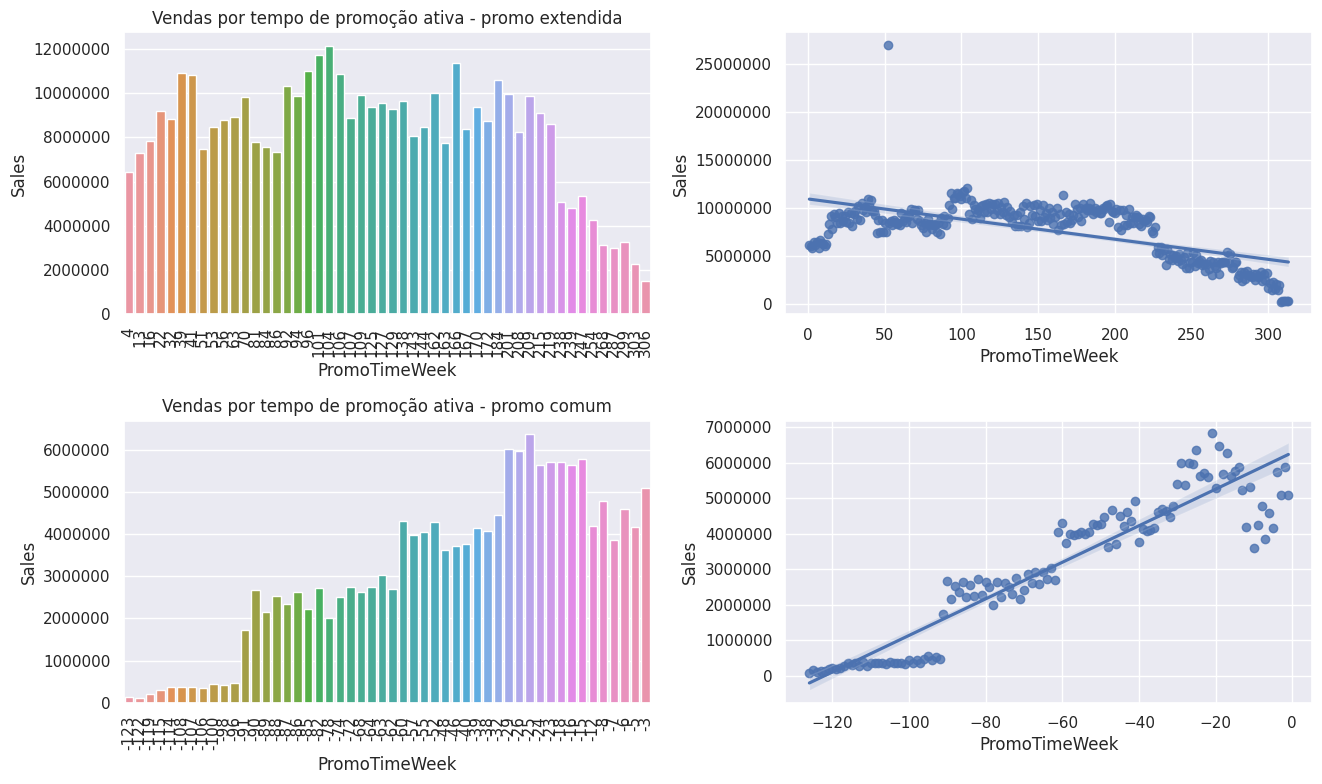

In [50]:



from matplotlib.gridspec import GridSpec
sns.set()

aux = df_stores[['PromoTimeWeek','Sales']].groupby('PromoTimeWeek')['Sales'].sum().reset_index()
aux2 = aux[aux['PromoTimeWeek']>0]
aux3 = aux[aux['PromoTimeWeek']<0]


grid = GridSpec(2,3)

plt.figure(figsize=(20,8))

plt.subplot(grid[0,0])
sns.barplot(aux2.sample(50), x='PromoTimeWeek', y='Sales')
plt.title('Vendas por tempo de promoção ativa - promo extendida')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')


plt.subplot(grid[0,1])
sns.regplot(aux2, x='PromoTimeWeek', y='Sales')
plt.ticklabel_format(style='plain', axis='y')


plt.subplot(grid[1,0])
sns.barplot(aux3.sample(50), x='PromoTimeWeek', y='Sales')
plt.title('Vendas por tempo de promoção ativa - promo comum')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')


plt.subplot(grid[1,1])
sns.regplot(aux3, x='PromoTimeWeek', y='Sales')
plt.ticklabel_format(style='plain', axis='y')


plt.tight_layout()

- Vemos que há uma queda nas vendas com promoção extendida, isso significa que esse tipo de promoção só funciona por um determinado período
- Já para as promoções comuns, as vendas apresentam um crescimento

Então a H4 é falsa, pois vimos que na promoção extendida as vendas caem quanto mais tempo a promoção está ativa

H7. Lojas com promoções consecutivas deveriam vender mais

In [52]:
df_stores[['Promo','Promo2','Sales']].groupby(['Promo','Promo2']).sum().reset_index().sort_values('Sales', ascending=False)

,Promo,Promo2,Sales
2,1,0,1628930532
0,0,0,1482612096
3,1,1,1472275754
1,0,1,1289362241



- O maior volume de venda foram das lojas que participaram somente da Promo1
- O menor volume de vendas foram das lojas que participaram apenas da Promo2
- O segundo menor volume de vendas foram das lojas que participaram de ambas as promoções

Não há vantagem em participar de promoções extendidas

Vamos ver se esse comportamento mudou ao longo do tempo

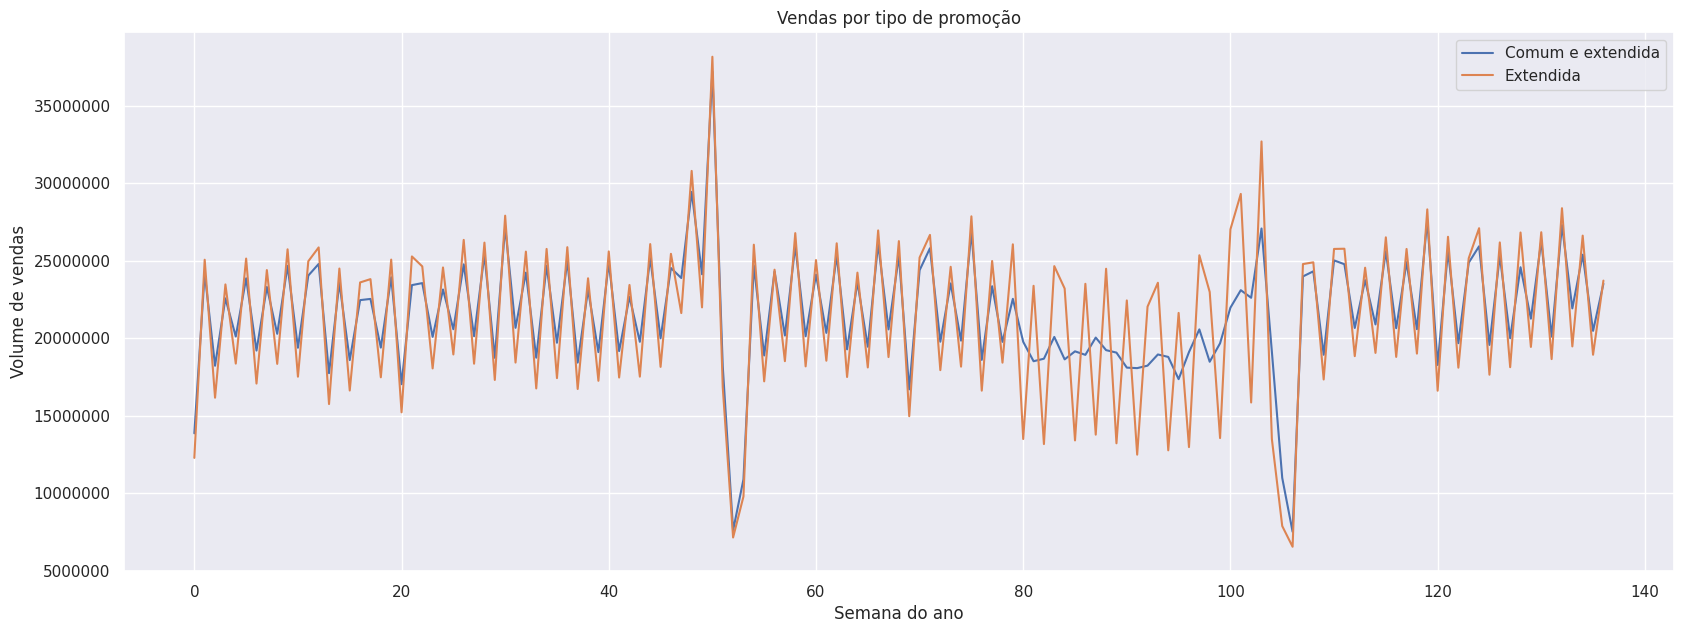

In [59]:
aux1 = df_stores[(df_stores['Promo']==1 & (df_stores['Promo2']==1))][['YearWeek','Sales']].groupby('YearWeek')['Sales'].sum().reset_index()
ax = aux1.plot(figsize=(20,7))
ax.set_xlabel('Semana do ano')
ax.set_ylabel('Volume de vendas')
aux2 = df_stores[(df_stores['Promo']==1 & (df_stores['Promo2']==0))][['YearWeek','Sales']].groupby('YearWeek')['Sales'].sum().reset_index()
aux2.plot(ax=ax)

ax.legend(labels=['Comum e extendida','Extendida'])
ax.set_title('Vendas por tipo de promoção')
plt.ticklabel_format(style='plain', axis='y')

A linha azul mostra que as lojas que participaram de promoções consecutivas não venderam mais do que as lojas que participaram apenas da promoção extendida (linha laranja). Os comportamentos apesar de parecidos, ainda há um volume menor para as promoções consecutivas.

Então a H7 é falsa, pois lojas com promoções consecutivas vendem menos.

H8. Lojas abertas durante o feriado de Natal deveriam vender mais

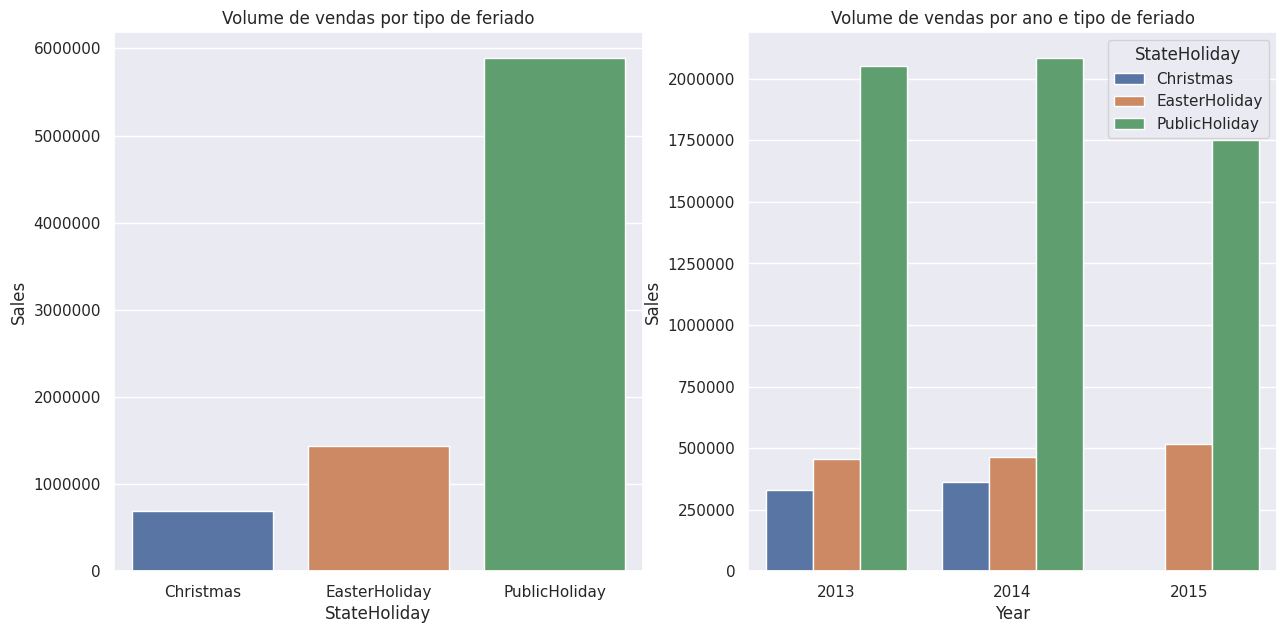

In [77]:
aux1 = df_stores[['StateHoliday','Sales']].groupby('StateHoliday')['Sales'].sum().reset_index()
aux1 = aux1[aux1['StateHoliday']!='RegularDay']

aux2 = df_stores[['Year','StateHoliday','Sales']].groupby(['Year','StateHoliday'])['Sales'].sum().reset_index()
aux2 = aux2[aux2['StateHoliday']!='RegularDay']
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.barplot(aux1, x='StateHoliday',y='Sales')
plt.title('Volume de vendas por tipo de feriado')
plt.ticklabel_format(style='plain', axis='y')

plt.subplot(1,2,2)
sns.barplot(aux2, x='Year',y='Sales', hue='StateHoliday')
plt.title('Volume de vendas por ano e tipo de feriado')
plt.ticklabel_format(style='plain', axis='y')

 A H8 é falsa, pois lojas abertas durante o feriado do Natal vendem menos.

H9. Lojas deveriam vender mais ao longo dos anos.

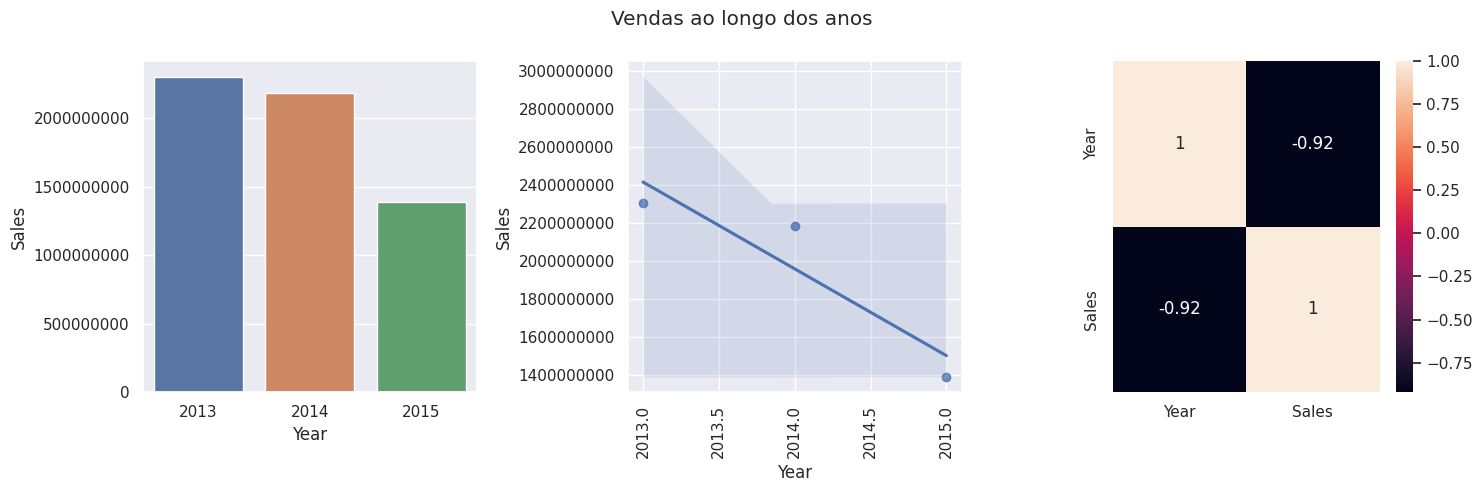

In [84]:
aux1 = df_stores[['Year', 'Sales']].groupby( 'Year' ).sum().reset_index()
plt.figure(figsize=(15,5))
plt.subplot( 1, 3, 1 )
sns.barplot( x='Year', y='Sales', data=aux1 )
plt.ticklabel_format(style='plain', axis='y')
plt.subplot( 1, 3, 2 )
sns.regplot( x='Year', y='Sales', data=aux1 )
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.subplot( 1, 3, 3 )
sns.heatmap( aux1.corr( method='pearson' ), annot=True )
plt.suptitle('Vendas ao longo dos anos')
plt.tight_layout()

Vemos que existe uma queda nas vendas durante os anos. Dessa forma, a H9 também é falsa.

H10. Lojas deveriam vender mais no segundo semestre do ano

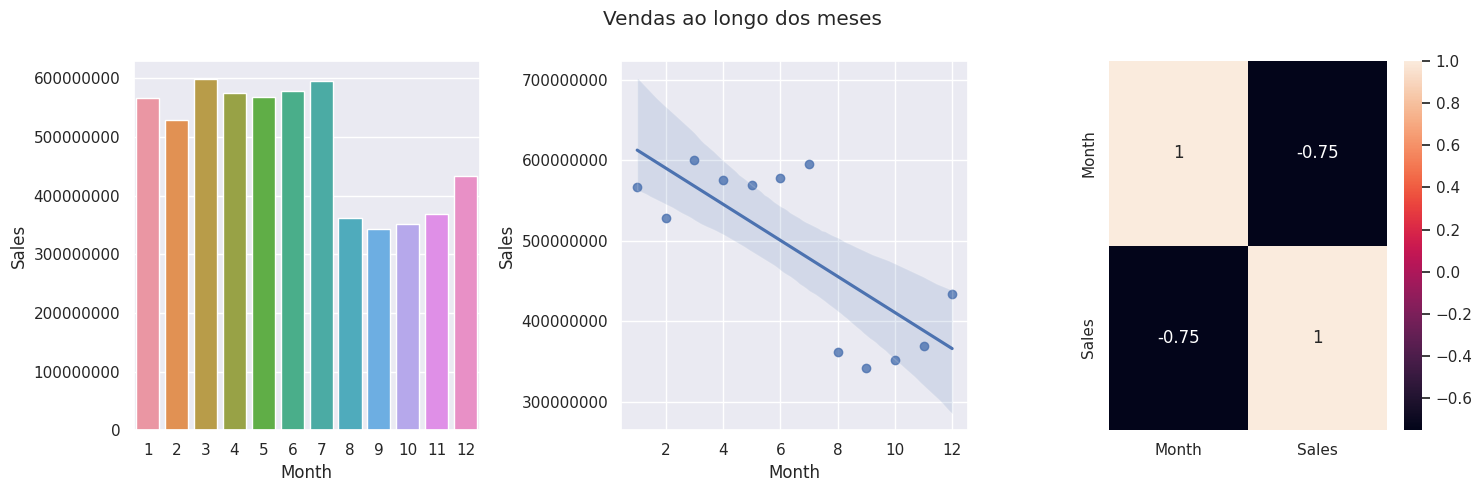

In [96]:
plt.figure(figsize=(15,5))
aux1 = df_stores[['Month', 'Sales']].groupby( 'Month' ).sum().reset_index()
plt.subplot( 1, 3, 1 )
sns.barplot( x='Month', y='Sales', data=aux1 )
plt.ticklabel_format(style='plain', axis='y')
plt.subplot( 1, 3, 2 )
sns.regplot( x='Month', y='Sales', data=aux1 )
plt.ticklabel_format(style='plain', axis='y')
plt.subplot( 1, 3, 3 )
sns.heatmap( aux1.corr( method='pearson' ), annot=True )
plt.suptitle('Vendas ao longo dos meses')
plt.tight_layout()

Vemos que a partir do mês 7 existe uma cada no volume vendas. Logo, a H10 é falsa, pois as lojas estão vendendo menos no segundo semestre.

H11. Lojas deveriam vender mais depois do dia 10 de cada mês

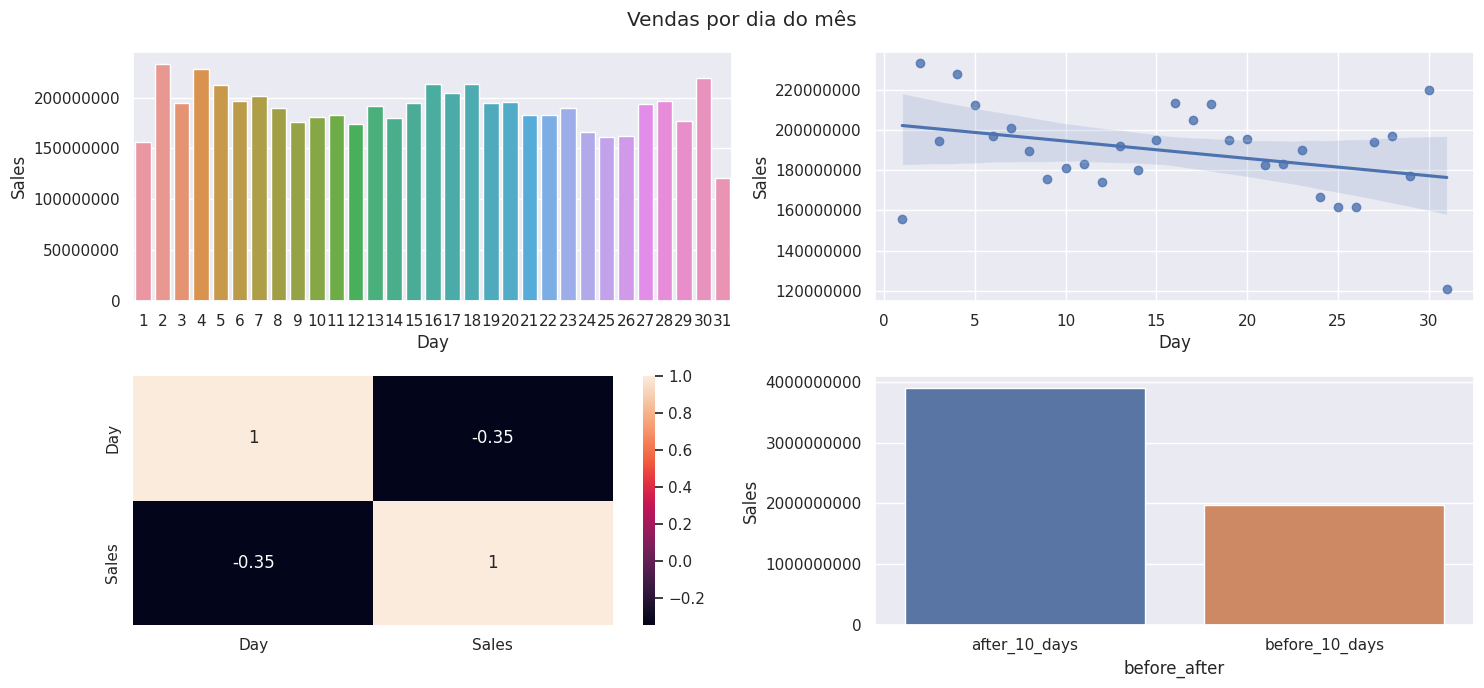

In [25]:
plt.figure(figsize=(15,7))
aux1 = df_stores[['Day', 'Sales']].groupby( 'Day' ).sum().reset_index()
plt.subplot( 2, 2, 1 )
sns.barplot( x='Day', y='Sales', data=aux1 )
plt.ticklabel_format(style='plain', axis='y')

plt.subplot( 2, 2, 2 )
sns.regplot( x='Day', y='Sales', data=aux1 )
plt.ticklabel_format(style='plain', axis='y')

plt.subplot( 2, 2, 3 )
sns.heatmap( aux1.corr( method='pearson' ), annot=True );
aux1['before_after'] = aux1['Day'].apply( lambda x: 'before_10_days' if x <= 10 else 'after_10_days' )
aux2 =aux1[['before_after', 'Sales']].groupby( 'before_after' ).sum().reset_index()
plt.subplot( 2, 2, 4 )
sns.barplot( x='before_after', y='Sales', data=aux2 )
plt.ticklabel_format(style='plain', axis='y')
plt.suptitle('Vendas por dia do mês')
plt.tight_layout()

Vemos que as lojas vendem mais depois do dia 10 de cada mês, logo, a H11 é verdadeira.

H12. Lojas deveriam vender menos aos finais de semana

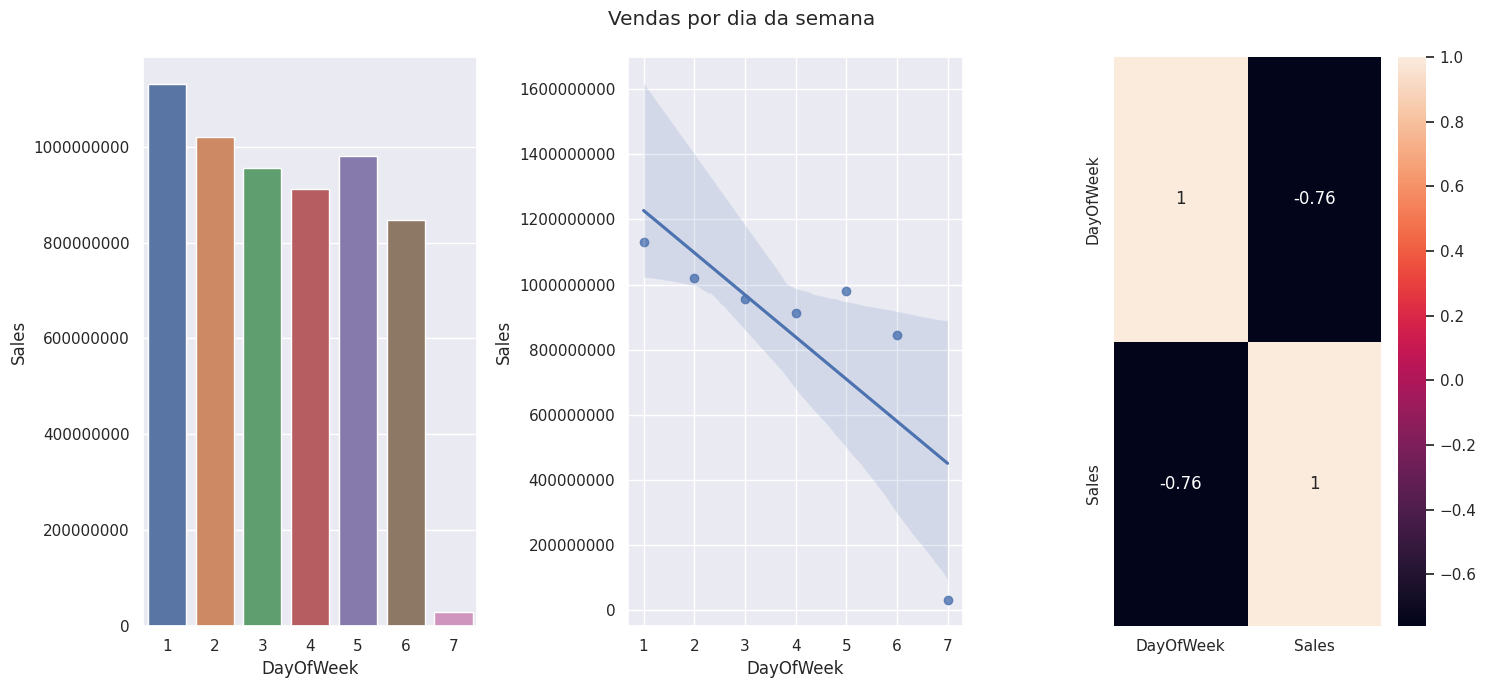

In [28]:
plt.figure(figsize=(15,7))
aux1 = df_stores[['DayOfWeek', 'Sales']].groupby( 'DayOfWeek' ).sum().reset_index()

plt.subplot( 1, 3, 1 )
sns.barplot( x='DayOfWeek', y='Sales', data=aux1 )
plt.ticklabel_format(style='plain', axis='y')

plt.subplot( 1, 3, 2 )
sns.regplot( x='DayOfWeek', y='Sales', data=aux1 )
plt.ticklabel_format(style='plain', axis='y')

plt.subplot( 1, 3, 3 )
sns.heatmap( aux1.corr( method='pearson' ), annot=True );

plt.suptitle('Vendas por dia da semana')
plt.tight_layout()


Vemos que o volume de vendas a partir que se aproximamos do final de semana apresenta uma queda. Então, a H12 é verdadeira.

H13. Lojas deveriam vender menos durante os feriados escolares

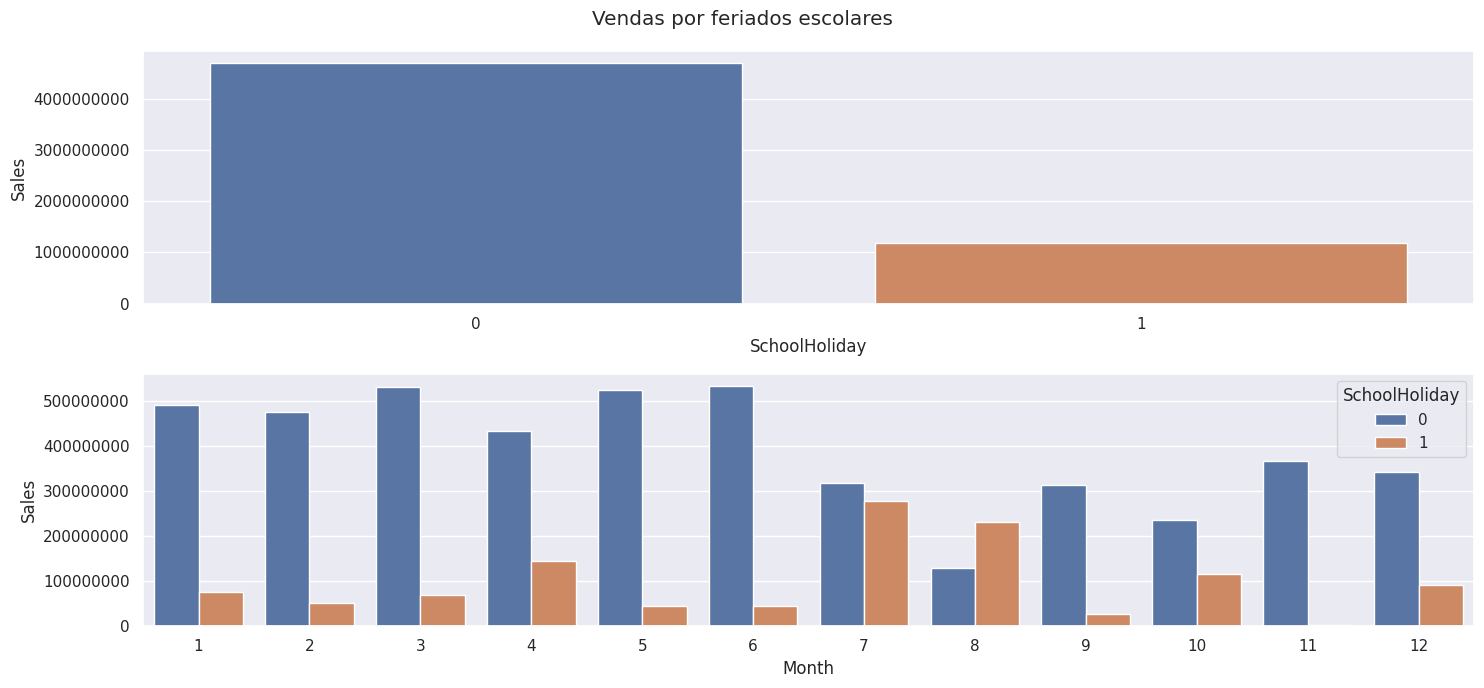

In [30]:
plt.figure(figsize=(15,7))
aux1 = df_stores[['SchoolHoliday', 'Sales']].groupby( 'SchoolHoliday' ).sum().reset_index()

plt.subplot( 2, 1, 1 )
sns.barplot( x='SchoolHoliday', y='Sales', data=aux1 )
plt.ticklabel_format(style='plain', axis='y')

aux2 = df_stores[['Month', 'SchoolHoliday', 'Sales']].groupby(['Month','SchoolHoliday']).sum().reset_index()

plt.subplot( 2, 1, 2 )
sns.barplot( x='Month', y='Sales', hue='SchoolHoliday', data=aux2 )
plt.ticklabel_format(style='plain', axis='y')

plt.suptitle('Vendas por feriados escolares')
plt.tight_layout()

Vemos que nos meses de julho e agosto (7 e 8) as vendas de feriados escolares mantém um volume relativamente maior do que as vendas de dias normais. Então, a H13 é verdadeira, pois as lojas vendem menos durante os feriados escolares, exceto para os meses de juho e agosto.

### Resumo das hipóteses

In [31]:
from tabulate import tabulate

In [33]:
tab =[['Hipoteses', 'Conclusao', 'Relevancia'],
['H1', 'Falsa', 'Baixa'],
['H2', 'Falsa', 'Media'],
['H3', 'Falsa', 'Media'],
['H4', 'Falsa', 'Baixa'],
['H5', '-', '-'],
['H7', 'Falsa', 'Baixa'],
['H8', 'Falsa', 'Media'],
['H9', 'Falsa', 'Alta'],
['H10', 'Falsa', 'Alta'],
['H11', 'Verdadeira', 'Alta'],
['H12', 'Verdadeira', 'Alta'],
['H13', 'Verdadeira', 'Baixa'],
]
print( tabulate( tab, headers='firstrow' ) )

Hipoteses    Conclusao    Relevancia
-----------  -----------  ------------
H1           Falsa        Baixa
H2           Falsa        Media
H3           Falsa        Media
H4           Falsa        Baixa
H5           -            -
H7           Falsa        Baixa
H8           Falsa        Media
H9           Falsa        Alta
H10          Falsa        Alta
H11          Verdadeira   Alta
H12          Verdadeira   Alta
H13          Verdadeira   Baixa


### Análise multivariada

<Axes: >

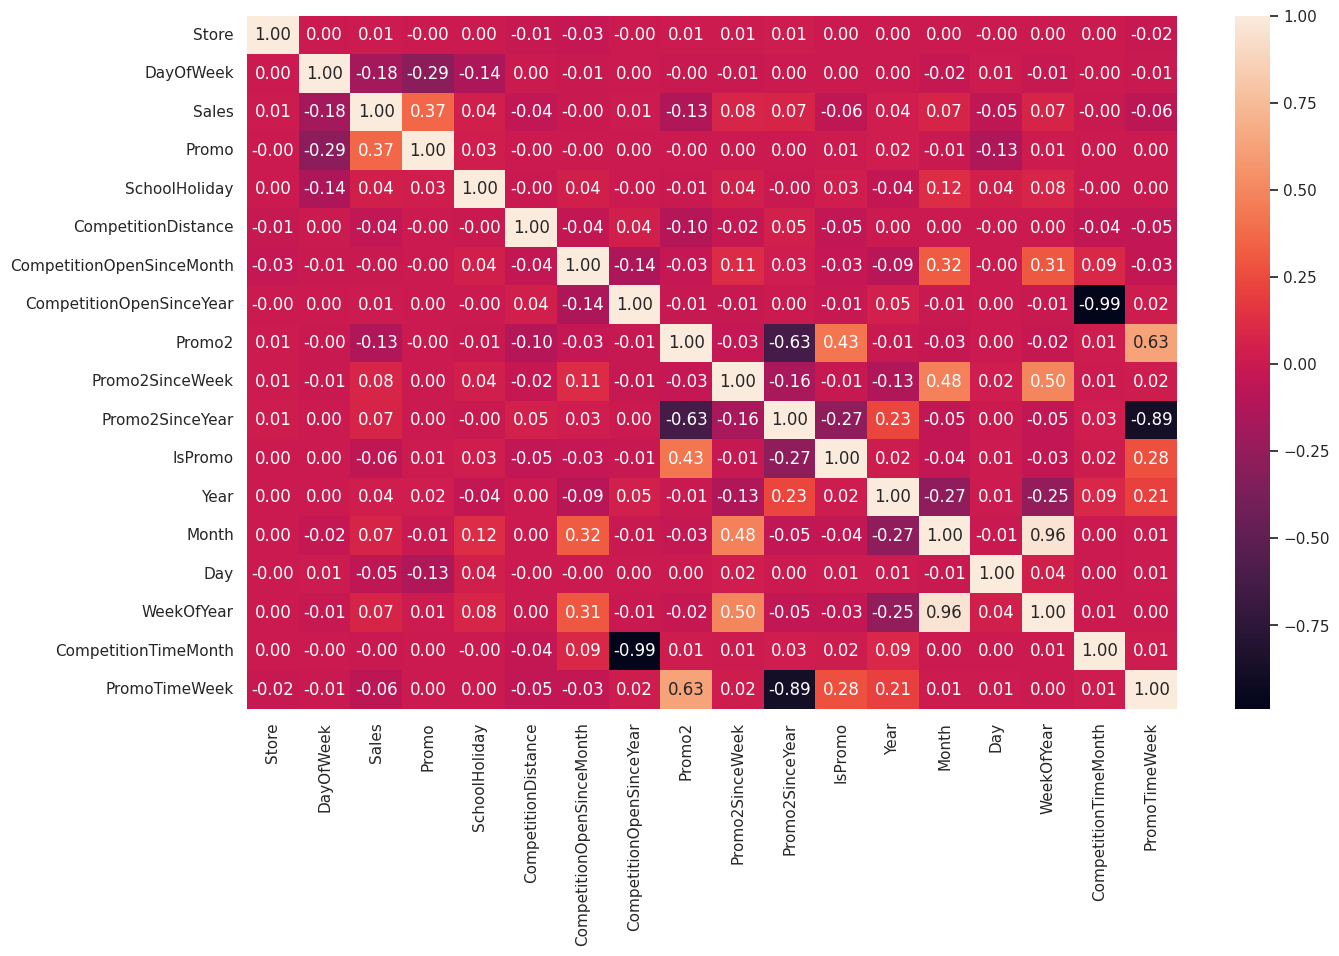

In [36]:
plt.figure(figsize=(15,9))
correlation = df_stores.corr(numeric_only=True, method='pearson' )
sns.heatmap( correlation, annot=True, fmt='.2f' )

Usando o método cramer v para as variáveis categóricas

In [42]:
import scipy.stats as ss

In [47]:
def cramer_v( x, y ):
    cm = pd.crosstab( x, y ).values
    n = cm.sum()
    r, k = cm.shape
    chi2 = ss.chi2_contingency( cm )[0]
    chi2corr = max( 0, chi2 - (k-1)*(r-1)/(n-1) )
    kcorr = k - (k-1)**2/(n-1)
    rcorr = r - (r-1)**2/(n-1)
    return np.sqrt( (chi2corr/n) / ( min( kcorr-1, rcorr-1 ) ) )

<Axes: >

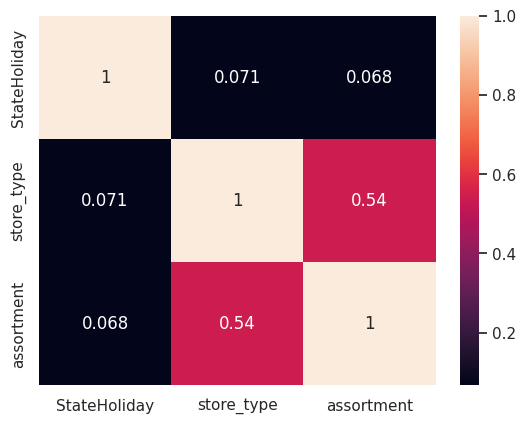

In [48]:
# categorical data
a = df_stores.select_dtypes( include='object' )
# cramer V
a1 = cramer_v( a['StateHoliday'], a['StateHoliday'] )
a2 = cramer_v( a['StateHoliday'], a['StoreType'] )
a3 = cramer_v( a['StateHoliday'], a['Assortment'] )
a4 = cramer_v( a['StoreType'], a['StateHoliday'] )
a5 = cramer_v( a['StoreType'], a['StoreType'] )
a6 = cramer_v( a['StoreType'], a['Assortment'] )


a7 = cramer_v( a['Assortment'], a['StateHoliday'] )
a8 = cramer_v( a['Assortment'], a['StoreType'] )
a9 = cramer_v( a['Assortment'], a['Assortment'] )
# Final dataset
d = pd.DataFrame( {'StateHoliday': [a1, a2, a3],
'store_type': [a4, a5, a6],
'assortment': [a7, a8, a9] })
d = d.set_index( d.columns )
sns.heatmap( d, annot=True )